In [3]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
with open('/content/drive/MyDrive/Colab Notebooks/credit.pkl', 'rb') as f:
  X_credit_train, y_credit_train, X_credit_test, y_credit_test = pickle.load(f)

In [5]:
X_credit_train.shape, y_credit_train.shape

((27693, 3), (27693,))

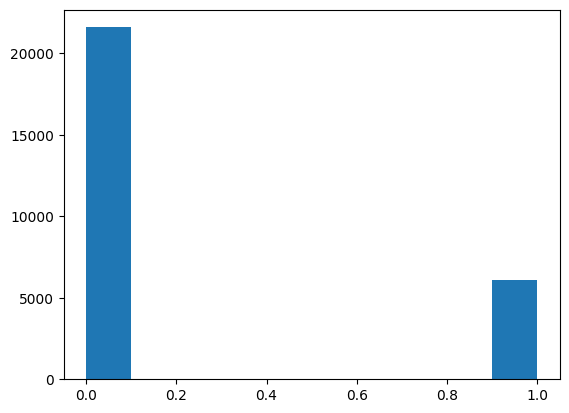

In [7]:
plt.hist(y_credit_train);

In [20]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=123)
X_credit_train_balanced, y_credit_train_balanced = smt.fit_resample(X_credit_train, y_credit_train)

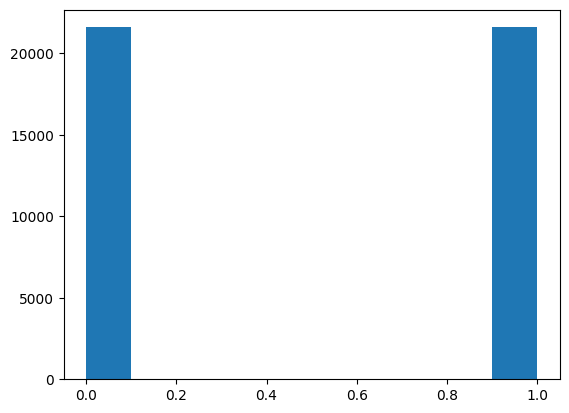

In [21]:
plt.hist(y_credit_train_balanced);

In [22]:
X_credit_train_balanced.shape, y_credit_train_balanced.shape

((43184, 3), (43184,))

In [23]:
from sklearn.naive_bayes import GaussianNB

In [41]:
nb_credit_model = GaussianNB()
nb_credit_model.fit(X_credit_train_balanced, y_credit_train_balanced)
previsoes = nb_credit_model.predict(X_credit_test)

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [43]:
accuracy_score(y_credit_test, previsoes)

0.3617021276595745

In [44]:
confusion_matrix(y_credit_test, previsoes)

array([[ 826, 3055],
       [  65,  942]])

In [45]:
print(classification_report(y_credit_test, previsoes))

              precision    recall  f1-score   support

           0       0.93      0.21      0.35      3881
           1       0.24      0.94      0.38      1007

    accuracy                           0.36      4888
   macro avg       0.58      0.57      0.36      4888
weighted avg       0.78      0.36      0.35      4888



In [46]:
from imblearn.under_sampling import RandomUnderSampler

In [49]:
rus = RandomUnderSampler(random_state=0)
X_credit_train_under, y_credit_train_under = rus.fit_resample(X_credit_train, y_credit_train)

In [51]:
X_credit_train_under.shape, y_credit_train_under.shape

((12202, 3), (12202,))

In [54]:
nb_credit_model_under = GaussianNB()
nb_credit_model_under.fit(X_credit_train_under, y_credit_train_under)
previsoes_under = nb_credit_model_under.predict(X_credit_test)

In [55]:
accuracy_score(y_credit_test, previsoes_under)

0.43719312602291327

In [56]:
confusion_matrix(y_credit_test, previsoes_under)

array([[1241, 2640],
       [ 111,  896]])

In [57]:
print(classification_report(y_credit_test, previsoes_under))

              precision    recall  f1-score   support

           0       0.92      0.32      0.47      3881
           1       0.25      0.89      0.39      1007

    accuracy                           0.44      4888
   macro avg       0.59      0.60      0.43      4888
weighted avg       0.78      0.44      0.46      4888



In [59]:
with open('/content/drive/MyDrive/Colab Notebooks/credit_oversampling.pkl', 'wb') as f:
  pickle.dump([X_credit_train_balanced, y_credit_train_balanced, X_credit_test, y_credit_test], f)

In [60]:
with open('/content/drive/MyDrive/Colab Notebooks/credit_undersampling.pkl', 'wb') as f:
  pickle.dump([X_credit_train_under, y_credit_train_under, X_credit_test, y_credit_test], f)